<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-Forest" data-toc-modified-id="Classification-Forest-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification Forest</a></span><ul class="toc-item"><li><span><a href="#Codes-by-Dingyi" data-toc-modified-id="Codes-by-Dingyi-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Codes by Dingyi</a></span><ul class="toc-item"><li><span><a href="#overall-log-loss" data-toc-modified-id="overall-log-loss-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>overall log loss</a></span></li></ul></li><li><span><a href="#Can-we-compute-log-loss-only-on-oob-data-?" data-toc-modified-id="Can-we-compute-log-loss-only-on-oob-data-?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Can we compute log loss only on oob data ?</a></span></li></ul></li><li><span><a href="#Simulated-Data" data-toc-modified-id="Simulated-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulated Data</a></span><ul class="toc-item"><li><span><a href="#Null-simulation" data-toc-modified-id="Null-simulation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Null simulation</a></span></li><li><span><a href="#Power-Simulation" data-toc-modified-id="Power-Simulation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Power Simulation</a></span></li></ul></li></ul></div>

I would like to tune the parameters of a random forest to optimize log loss.

In paticular, I am interested in finding the best value for `min_samples_leaf`, which minimizes the log loss on a hold-out set (oob or CV).

https://scikit-learn.org/stable/modules/grid_search.html

In [5]:
#import treeinterpreter as ti

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
import random
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns


In [14]:
def log_loss_score(predicted, actual, eps=1e-14):

        """
        :param predicted:   The predicted probabilities as floats between 0-1
        :param actual:      The binary labels. Either 0 or 1.
        :param eps:         Log(0) is equal to infinity, so we need to offset our predicted values slightly by eps from 0 or 1
        :return:            The logarithmic loss between between the predicted probability assigned to the possible outcomes for item i, and the actual outcome.
        """

        predicted = np.clip(predicted, eps, 1-eps)
        loss = -1 * np.nanmean(actual * np.log(predicted) + (1 - actual) * np.log(1-predicted))

        return loss

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/markusloecher/shap/master/Explore/titanicnoMissingAge.csv') # Load the data
cleaned_titanic = df[['Age', 'Pclass','Sex', 'PassengerId', 'Survived']]
cleaned_titanic


,Age,Pclass,Sex,PassengerId,Survived
0,22.0,3,2,1,0
1,38.0,1,1,2,1
2,26.0,3,1,3,1
3,35.0,1,1,4,1
4,35.0,3,2,5,0
...,...,...,...,...,...
709,39.0,3,1,886,0
710,27.0,2,2,887,0
711,19.0,1,1,888,1
712,26.0,1,2,890,1


In [7]:
cleaned_titanic.to_csv("/Users/aubrey/Documents/GitHub/imodels-experiments/data/imodels_data/cleaned_titanic.csv",index=False)


In [8]:
Y = df['Survived']
X =  df[['Age', 'Pclass','Sex', 'PassengerId']]

X_train = X.to_numpy()
Y_train = Y.to_numpy()

In [12]:
X.columns.tolist()

['Age', 'Pclass', 'Sex', 'PassengerId']

## Classification Forest 



In [10]:
'''# fit a scikit-learn's classification model
np.random.seed(0)
#rf = RandomForestRegressor(n_estimators=1, max_depth =3)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf =10, oob_score = True, 
                            random_state=0,max_features = "auto")
rf.fit(X_train, Y_train)
'''

'# fit a scikit-learn\'s classification model\nnp.random.seed(0)\n#rf = RandomForestRegressor(n_estimators=1, max_depth =3)\nrf = RandomForestClassifier(n_estimators=100, min_samples_leaf =10, oob_score = True, \n                            random_state=0,max_features = "auto")\nrf.fit(X_train, Y_train)\n'

### Codes by Dingyi

This document provides different options while using `GridSearchCV`
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

"neg_log_loss" is a string representative for log loss, i.e. the negative log loss, which is simply the log loss multiplied by -1. This is an easy way to deal with a maximization problem. Instead of minimizing log loss, it can maximize negative log loss, which is equivalent.

The formula of "log_loss" in sklearn.metrics is in: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss

In [ ]:
#for i in [range(1,8),range(10,100,10)]:
 #   print(i)
!conda install pydump

In [25]:
######### Codes by Dingyi
import time
# Time records
start_time = time.time()
np.random.seed(0)

##
from sklearn.model_selection import GridSearchCV
print('Tuning random forest classifier')
rf = RandomForestClassifier(n_estimators=100, random_state=0, # random_state works as random.seed
                            criterion="entropy")

# (1 to e.g. 50) and max_features (2 to 4 ) -> (1 to 4)

# Define meta-parameter grid of candidate settings
# The following settings are just for illustration
param_grid = {'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90],  # very small values and not suitable for application. Use larger sizes to build good classifiers
              'max_features': range(1,5)
              }

# Set up the grid object specifying the tuning options
gs_rf = GridSearchCV(rf, param_grid, cv=10, scoring='neg_log_loss')
gs_rf.fit(X_train, Y_train)
##

print("--- %s seconds ---" % (time.time() - start_time))

Tuning random forest classifier
--- 86.80387616157532 seconds ---


In [26]:
print("Best CV Entropy: %0.4f" % (-gs_rf.best_score_))
print("Optimal RF meta-parameters:")
print(gs_rf.best_params_)


Best CV Entropy: 0.4443
Optimal RF meta-parameters:
{'max_features': 3, 'min_samples_leaf': 20}


In [27]:
P_surv = gs_rf.best_estimator_.predict_proba(X_train) # Select the best estimator and predict the prob.
np.sum(np.isnan(P_surv))
#P_surv[:,1]

0

In [39]:
# Store the results from cv in a dataframe
gs_rf_result = pd.DataFrame(columns=['min_samples_leaf','max_features','log_loss'])
gs_rf_result['min_samples_leaf']=gs_rf.cv_results_['param_min_samples_leaf'].data.astype('int')
gs_rf_result['max_features']=gs_rf.cv_results_['param_max_features'].data.astype('int')
gs_rf_result['log_loss']=-gs_rf.cv_results_['mean_test_score']
gs_rf_result

,min_samples_leaf,max_features,log_loss
0,1,1,0.757564
1,2,1,0.742887
2,3,1,0.724563
3,4,1,0.711264
4,5,1,0.706762
...,...,...,...
59,50,4,0.692648
60,60,4,0.692648
61,70,4,0.692648
62,80,4,0.692648


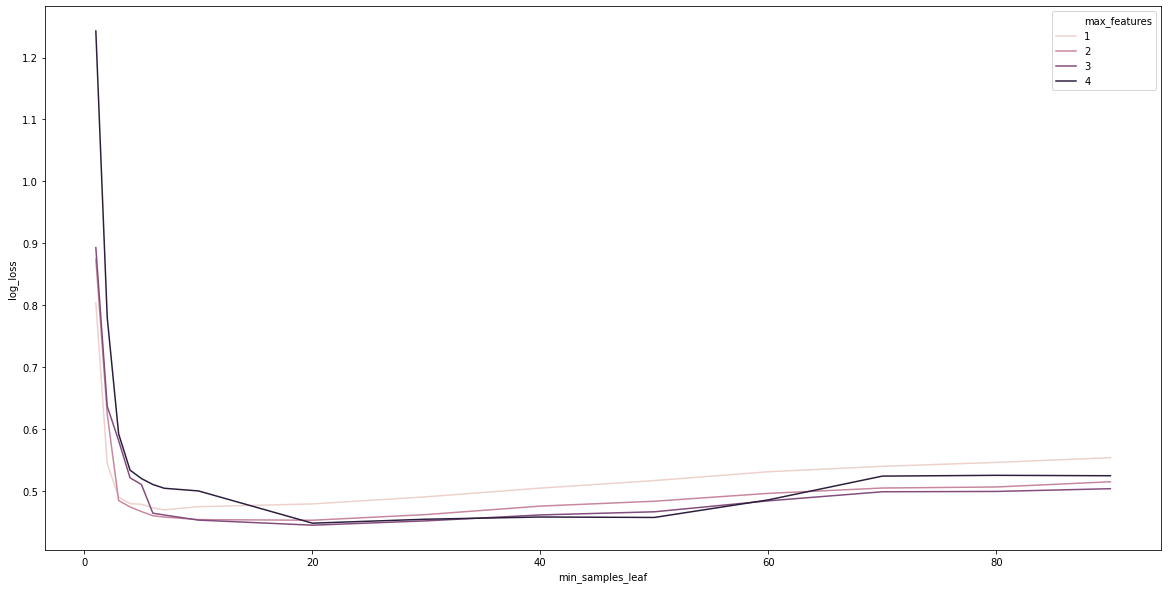

In [29]:
# Plot of the log loss versus the min_samples_leaf parameter
# One line for each value of max_features
# For better illustration, I extend the range of "max_features" to 1-4
import seaborn as sns
%matplotlib inline  
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=gs_rf_result, x="min_samples_leaf", y="log_loss", hue="max_features")

 #### overall log loss

In [ ]:
LogLoss = log_loss_score(P_surv[:,1],Y_train)
LogLoss

### Can we compute log loss only on oob data ?

**Dingyi's comment: Cross validation should already tackle the problem, so I don't use oob data inside the function**

Check out the Boolean `oob_score` in combination with a custmized loss function (possibly specified by `criterion = "entropy"`)

If not, we might need to switch to cross validation, e.g. k=5 or 10

In [ ]:
# Using the best parameters
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf =13, oob_score = True, 
                            random_state=0,max_features = 3,criterion = "entropy")
rf.fit(X_train, Y_train)
rf.oob_score_

## Simulated Data

We replicate the simulation design used by Strobl et al (2007) where a binary response variable Y is  predicted from a set of $5$ predictor variables that vary in their scale of measurement and
number of categories. The first predictor variable $X_1$ is continuous, while the other predictor variables $X_2 ,\ldots, X_5$ are
multinomial with $2, 4, 10, 20$ categories, respectively. 
The sample size for all simulation studies was set to n = 120.
In the first *null case*  all predictor variables and the response are sampled
independently. We would hope that a reasonable variable importance measure would not prefer any one predictor variable over any other.
In the second simulation study, the so-called *power case*,
 the distribution of the response is a binomial process with probabilities that depend on the value
of $x_2$, namely $P(y=1|X_2=1)=0.35, P(y=1|X_2=2)=0.65$ .


In [3]:
def SimulateData_simple(n=120, # number of rows in data
                        #M=100, # number of simulations
                        #nCores = M, # number of cores to use; set to 1 on Windows!
                        relevance = 0.15, # signal srength (0 for NULL)
                        #correctBias = c(inbag=TRUE,outbag=TRUE),
                        verbose=0):
  
    x1 = np.random.randn(n)
    x2 = np.random.randint(1, 3, n)
    x3 = np.random.randint(1, 5, n)
    x4 = np.random.randint(1, 11, n)
    x5 = np.random.randint(1, 21, n)
    # y = np.random.binomial(n = 1, p = 0.5 + [-1,1][x2[0]-1] * relevance, size = n)
    y = np.array([]) 
    for i in range(n):
      y = np.append(y, np.random.binomial(n = 1, p = 0.5 + [-1,1][x2[i]-1] * relevance, size = 1))

    x_train = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}, columns=['x1', 'x2', 'x3', 'x4', 'x5'])

    return(x_train, y)

X_null, Y_null = SimulateData_simple(n=400, relevance=0)
X_power, Y_power = SimulateData_simple(n=400, relevance=0.15)

### Null simulation

In [34]:
# Time records
start_time = time.time()
np.random.seed(0)

##
from sklearn.model_selection import GridSearchCV
print('Tuning random forest classifier for the NULL case')
rf = RandomForestClassifier(n_estimators=100, random_state=0, # random_state works as random.seed
                            criterion="entropy")

# (1 to e.g. 50) and max_features (2 to 4 ) -> (1 to 4)

# Define meta-parameter grid of candidate settings
# The following settings are just for illustration
param_grid = {'min_samples_leaf': [1, 2, 3, 5, 7, 10, 20, 30, 40, 50],  # very small values and not suitable for application. Use larger sizes to build good classifiers
              'max_features': range(1,5)
              }

# Set up the grid object specifying the tuning options
gs_rf = GridSearchCV(rf, param_grid, cv=10, scoring='neg_log_loss')
gs_rf.fit(X_null, Y_null)
##

print("--- %s seconds ---" % np.round(time.time() - start_time,1))

Tuning random forest classifier
--- 63.55488896369934 seconds ---


In [47]:
# Store the results from cv in a dataframe
gs_rf_result = pd.DataFrame(columns=['min_samples_leaf','max_features','log_loss'])
gs_rf_result['min_samples_leaf']=gs_rf.cv_results_['param_min_samples_leaf'].data.astype('int')
gs_rf_result['max_features']=gs_rf.cv_results_['param_max_features'].data.astype('int')
gs_rf_result['log_loss']=-gs_rf.cv_results_['mean_test_score']
gs_rf_result#.head

,min_samples_leaf,max_features,log_loss
0,1,1,0.703935
1,2,1,0.675648
2,3,1,0.676392
3,5,1,0.669932
4,7,1,0.672553
5,10,1,0.668945
6,20,1,0.673338
7,30,1,0.677564
8,40,1,0.692876
9,50,1,0.692876


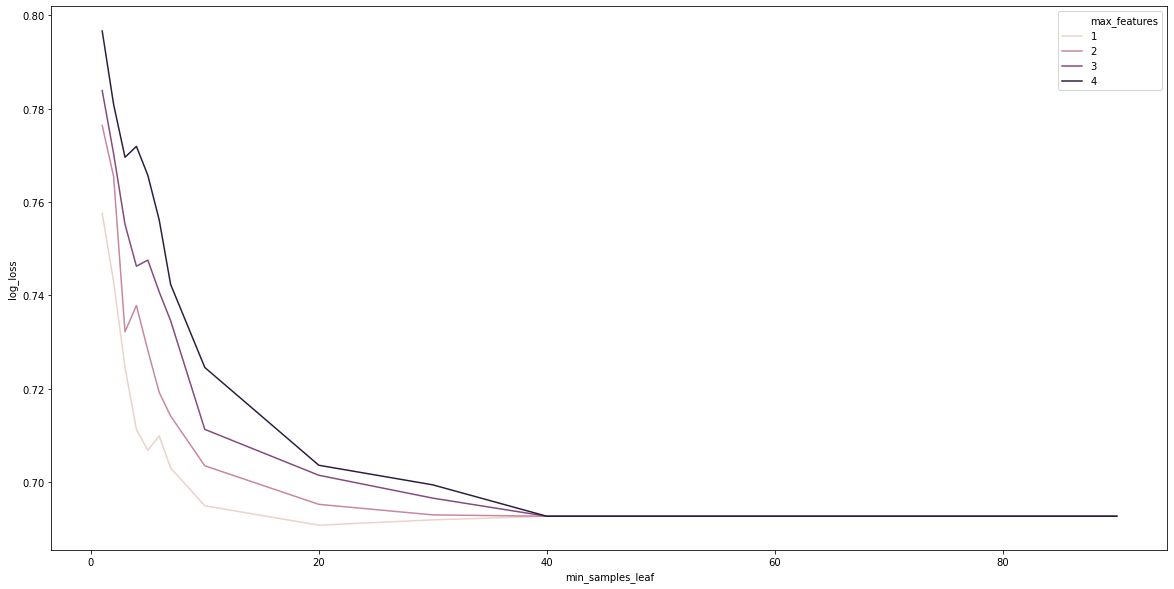

In [41]:
%matplotlib inline  
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=gs_rf_result, x="min_samples_leaf", y="log_loss", hue="max_features");


### Power Simulation

In [49]:
# Time records
start_time = time.time()
np.random.seed(0)

##
from sklearn.model_selection import GridSearchCV
print('Tuning random forest classifier for the power case')
rf = RandomForestClassifier(n_estimators=100, random_state=0, # random_state works as random.seed
                            criterion="entropy")

# (1 to e.g. 50) and max_features (2 to 4 ) -> (1 to 4)

# Define meta-parameter grid of candidate settings
# The following settings are just for illustration
param_grid = {'min_samples_leaf': [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 45, 60],  # very small values and not suitable for application. Use larger sizes to build good classifiers
              'max_features': range(1,5)
              }

# Set up the grid object specifying the tuning options
gs_rf = GridSearchCV(rf, param_grid, cv=10, scoring='neg_log_loss')
gs_rf.fit(X_power, Y_power)
##

print("--- %s seconds ---" % np.round(time.time() - start_time,1))

# Store the results from cv in a dataframe
gs_rf_result = pd.DataFrame(columns=['min_samples_leaf','max_features','log_loss'])
gs_rf_result['min_samples_leaf']=gs_rf.cv_results_['param_min_samples_leaf'].data.astype('int')
gs_rf_result['max_features']=gs_rf.cv_results_['param_max_features'].data.astype('int')
gs_rf_result['log_loss']=-gs_rf.cv_results_['mean_test_score']
#gs_rf_result.head

Tuning random forest classifier for the power case
--- 48.9 seconds ---


<bound method NDFrame.head of     min_samples_leaf  max_features  log_loss
0                  1             1  0.720275
1                  2             1  0.692092
2                  3             1  0.667420
3                  5             1  0.654731
4                  7             1  0.646595
5                 10             1  0.642972
6                 15             1  0.639222
7                 20             1  0.640600
8                 25             1  0.640645
9                 30             1  0.642351
10                40             1  0.646610
11                45             1  0.647203
12                 1             2  0.738668
13                 2             2  0.707532
14                 3             2  0.684222
15                 5             2  0.666293
16                 7             2  0.650774
17                10             2  0.643971
18                15             2  0.634769
19                20             2  0.630561
20                25     

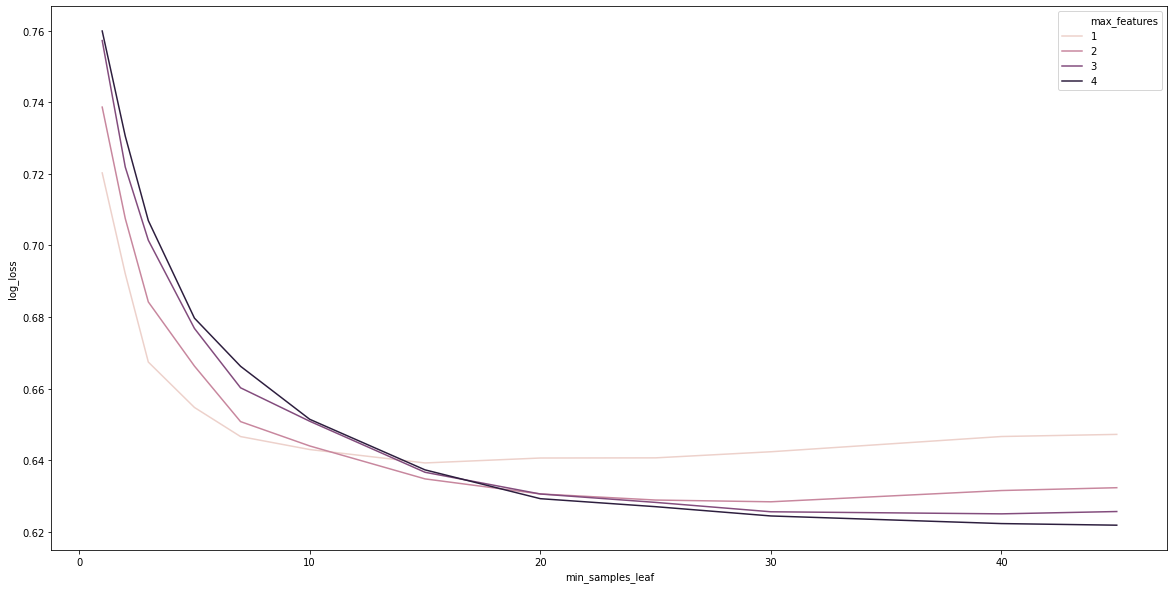

In [50]:
%matplotlib inline  
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=gs_rf_result, x="min_samples_leaf", y="log_loss", hue="max_features");


In [51]:
gs_rf.cv_results_


{'mean_fit_time': array([0.12381165, 0.12002413, 0.09234664, 0.08681858, 0.08488576,
        0.08599203, 0.08322797, 0.08416014, 0.09221053, 0.08726227,
        0.08902426, 0.08239341, 0.1067879 , 0.10208087, 0.09597821,
        0.09075465, 0.09146271, 0.0914396 , 0.08599966, 0.08572667,
        0.08245728, 0.0922564 , 0.09341013, 0.08874149, 0.11037059,
        0.10890749, 0.10027726, 0.09553332, 0.09312451, 0.09250417,
        0.09300182, 0.08749695, 0.08853981, 0.08419173, 0.08269851,
        0.08370149, 0.11068461, 0.1115279 , 0.10483637, 0.10096145,
        0.10251818, 0.09638197, 0.09030666, 0.09375081, 0.09012308,
        0.08728514, 0.08597479, 0.08683589]),
 'std_fit_time': array([0.03410098, 0.00864551, 0.00483644, 0.00264064, 0.00359675,
        0.00441805, 0.00303945, 0.00388449, 0.01059322, 0.00494809,
        0.00666873, 0.00601161, 0.00726424, 0.00656091, 0.00367598,
        0.00173594, 0.00332932, 0.0064332 , 0.00192821, 0.0028211 ,
        0.00109849, 0.0134783 , 0.009